In [1]:
import import_ipynb
import matplotlib.pyplot as plt
import numpy as np
from shared_functions import generate_laguerre_polynomials
from shared_functions import hinv

importing Jupyter notebook from shared_functions.ipynb
0.99999 0.9999900011705504


In [3]:
# Generate Laguerre polynomials
num_terms = 100
laguerre_polynomials = generate_laguerre_polynomials(num_terms)

#Verify that it returns the correct inverse
z=0.99999
hz=np.arctanh(z)/(z)
logepsZvec = hinv(hz, laguerre_polynomials)
epsZvec = np.exp(logepsZvec)
zvec = 1 - epsZvec

print(z, zvec)

0.99999 0.9999900011705504


In [4]:
def analytical_sol(N, eps):

    hy = 0.5 * (np.log(2-eps) - np.log(eps)) / (1-eps)
    alpha =  hinv((1/N) * (hy) - (1/N) + 1, laguerre_polynomials)	  
    
    z = 1 -	np.exp(alpha)
    
    phiA = z * ((2.0-eps) / (z+(1.0-eps)))
    phiB = z * ((eps) / (z+(1.0-eps)))
    bvec = phiA + phiB
    term1 = (1/N - 1.0) / (bvec)
    term2 = (np.log(1+z)-np.log(1-z))/(bvec**(2) * (1.0-eps))
    chi = term1 + term2
    return (phiA, phiB, chi)


In [5]:
## Phase Diagram of Analytical solution

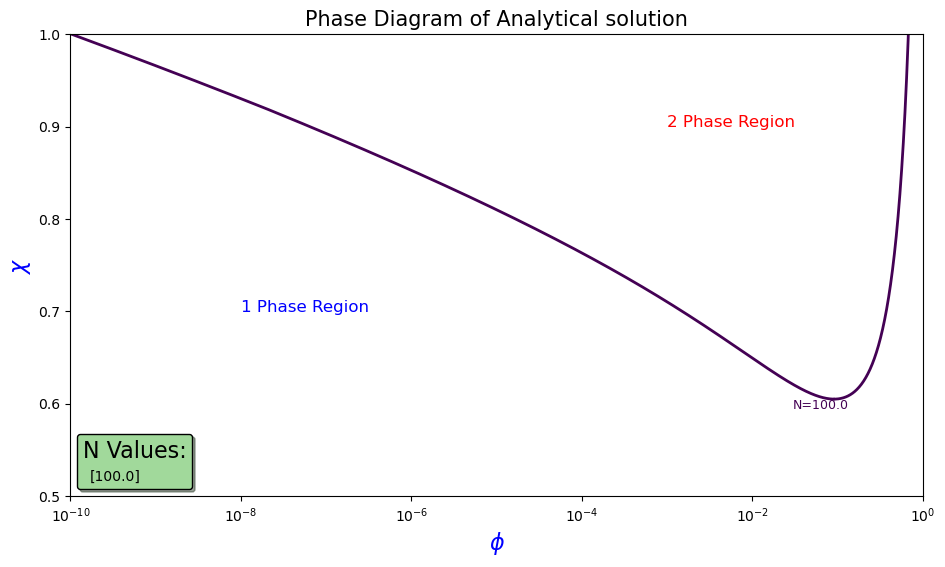

In [16]:

N_values = [100.0] 

# Initialize the plot
plt.figure(figsize=(11, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(N_values)))


# Set N values

eps_values = np.logspace(-30, -0.01, 5000)
for i, N in enumerate(N_values):
    
    # Lists to store solutions
    phiA_solutions = []
    phiB_solutions = []
    chi_solutions = []
    
    phiA_solutions, phiB_solutions, chi_solutions = analytical_sol(N, eps_values)
   

    # Plotting
    plt.plot(phiA_solutions, chi_solutions, color=colors[i], linestyle='-', linewidth=2)
    plt.plot(phiB_solutions, chi_solutions, color=colors[i], linestyle='-', linewidth=2)

    plt.annotate(f'N={N}', xy=(phiA_solutions[1], chi_solutions[-1]), xytext=(-125, -10), textcoords='offset pixels', color=colors[i], fontsize=9)

plt.annotate(f'1 Phase Region', xy=(10e-9, .7), xytext=(0, 0), textcoords='offset pixels', color='blue', fontsize=12)
plt.annotate(f'2 Phase Region', xy=(10e-4, .9), xytext=(0, 0), textcoords='offset pixels', color='red', fontsize=12)

# Adding labels and title
plt.xlabel(r'$\phi$', fontsize=16, color='blue')
plt.ylabel(r'$\chi$', fontsize=16, color='blue')
plt.title(r'Phase Diagram of Analytical solution', fontsize=15)
plt.scatter([], [], color='none', label=f'{N_values}')
plt.xscale('log')
plt.xlim(1e-10, 1)
plt.ylim(0.5, 1)


# Adding a legend
plt.legend(title='N Values:', title_fontsize='16', fontsize='10', loc='lower left', frameon=True, shadow=True, framealpha=1, edgecolor='black', facecolor='#a1d99b', markerfirst=False)
plt.grid(False)

# Display the plot
plt.show()
    

In [7]:
## chi(phi)   test code

IndexError: index 1 is out of bounds for axis 0 with size 1

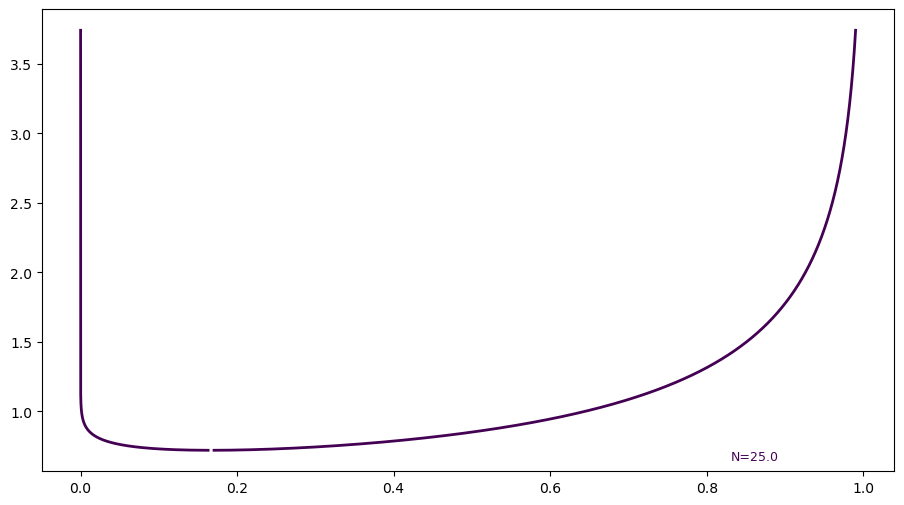

In [8]:

       
# Initialize the plot
plt.figure(figsize=(11, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(N_values)))


# Set N values
N_values = [25.0, 50.0, 100.0] 

eps_values = np.logspace(-30, -0.01, 5000)
for i, N in enumerate(N_values):
    
    # Lists to store solutions
    phiA_solutions = []
    phiB_solutions = []
    chi_solutions = []
    
    phiA_solutions, phiB_solutions, chi_solutions = analytical_sol(N, eps_values)
   
        

    # Plotting
    plt.plot(phiA_solutions, chi_solutions, color=colors[i], linestyle='-', linewidth=2)
    plt.plot(phiB_solutions, chi_solutions, color=colors[i], linestyle='-', linewidth=2)

    plt.annotate(f'N={N}', xy=(phiA_solutions[1], chi_solutions[-1]), xytext=(-125, -10), textcoords='offset pixels', color=colors[i], fontsize=9)


# Adding labels and title
plt.xlabel(r'$\phi$', fontsize=16, color='blue')
plt.ylabel(r'$\chi$', fontsize=16, color='blue')
plt.title(r'Phase Diagram of Analytical solution', fontsize=15)
plt.scatter([], [], color='none', label=f'{N_values}')
plt.xscale('log')
plt.xlim(1e-10, 1)
plt.ylim(0.5, 1)


# Adding a legend
plt.legend(title='N Values:', title_fontsize='16', fontsize='10', loc='lower left', frameon=True, shadow=True, framealpha=1, edgecolor='black', facecolor='#a1d99b', markerfirst=False)
plt.grid(False)

# Display the plot
plt.show()
    

In [ ]:
## chi(1-y)

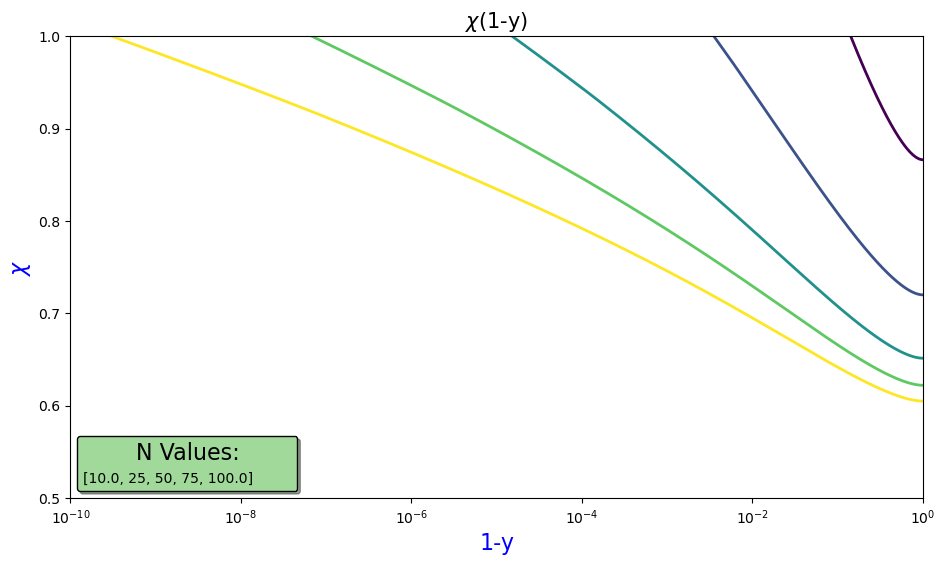

In [10]:
# Set N values
N_values = [10.0, 25, 50, 75, 100.0] 

# Initialize the plot
plt.figure(figsize=(11, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(N_values)))

eps_values = np.logspace(-30, -0.01, 5000)
for i, N in enumerate(N_values):
    
    # Lists to store solutions
    phiA_solutions = []
    phiB_solutions = []
    chi_solutions = []
    
    phiA_solutions, phiB_solutions, chi_solutions = analytical_sol(N, eps_values)
   
        

    # Plotting
    plt.plot(eps_values, chi_solutions, color=colors[i], linestyle='-', linewidth=2)
    plt.annotate(f'N={N}', xy=(eps_values[1], chi_solutions[-1]), xytext=(0, 0), textcoords='offset points', color=colors[i], fontsize=9)


# Adding labels and title
plt.xlabel(r'1-y', fontsize=16, color='blue')
plt.ylabel(r'$\chi$', fontsize=16, color='blue')
plt.title(r'$\chi$(1-y)', fontsize=15)
plt.scatter([], [], color='none', label=f'{N_values}')
plt.xscale('log')
plt.xlim(1e-10, 1)
plt.ylim(0.5, 1)


# Adding a legend
plt.legend(title='N Values:', title_fontsize='16', fontsize='10', loc='lower left', frameon=True, shadow=True, framealpha=1, edgecolor='black', facecolor='#a1d99b', markerfirst=False)
plt.grid(False)

# Display the plot
plt.show()
    

In [ ]:
## chi(1-y)  test code

In [ ]:
##  chi(1-y)plot  and   chi(u)scatter       combined

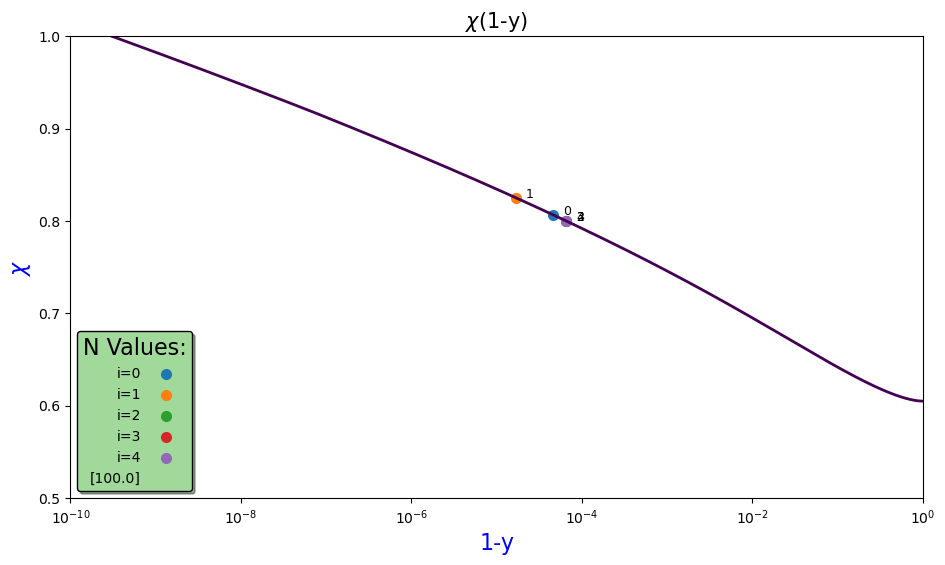

In [9]:
# Initialize the plot
plt.figure(figsize=(11, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(N_values)))

# Set N values
N_values = [100.0] 

eps_values = np.logspace(-30, -0.01, 5000)
for i, N in enumerate(N_values):
    
    # Lists to store solutions
    phiA_solutions = []
    phiB_solutions = []
    chi_solutions = []
    
    phiA_solutions, phiB_solutions, chi_solutions = analytical_sol(N, eps_values)
   
    # Plotting
    plt.plot(eps_values, chi_solutions, color=colors[i], linestyle='-', linewidth=2)
    plt.annotate(f'N={N}', xy=(eps_values[1], chi_solutions[-1]), xytext=(0, 0), textcoords='offset points', color=colors[i], fontsize=9)



chi = 10
chi_target = 0.8
tol = 1e-6
u0 = -10
u1 = -11
i=1
u_vec = [u0, u1]
N=100

phiA, phiB, chi0 = analytical_sol(N, np.exp(u0))
phiA, phiB, chi1 = analytical_sol(N, np.exp(u1))
chi_list = [chi0, chi1]

while abs(chi - chi_target) > tol:

    ui = u_vec[i]
    ui_m1 = u_vec[i-1]
    if i == 1:
        phiA, phiB, chi = analytical_sol(N, np.exp(ui))
    if i == 1:
        phiA_m1, phiB_m1, chi_m1 = analytical_sol(N, np.exp(ui_m1))
    fui_m1 = chi_m1 - chi_target
    fui = chi -chi_target
    
    fp_i = (fui - fui_m1)/ (ui - ui_m1)
    ui_p1 = ui - (fui / fp_i)
    phiA_p1, phiB_p1, chi_p1 = analytical_sol(N, np.exp(ui_p1))

    u_vec.append(ui_p1)
    chi_list.append(chi_p1)
    chi_m1 = chi
    chi = chi_p1
    i+=1
    
# Plotting
for i in range(len(u_vec)):
    plt.scatter(np.exp(u_vec[i]), chi_list[i], linewidth=2, label=f'i={i}')
    plt.annotate(f'{i}', xy=(np.exp(u_vec[i]), chi_list[i]), xytext=(10, 0), textcoords='offset pixels', fontsize=9)




# Adding labels and title
plt.xlabel(r'1-y', fontsize=16, color='blue')
plt.ylabel(r'$\chi$', fontsize=16, color='blue')
plt.title(r'$\chi$(1-y)', fontsize=15)
plt.scatter([], [], color='none', label=f'{N_values}')
plt.xscale('log')
plt.xlim(1e-10, 1)
plt.ylim(0.5, 1)


# Adding a legend
plt.legend(title='N Values:', title_fontsize='16', fontsize='10', loc='lower left', frameon=True, shadow=True, framealpha=1, edgecolor='black', facecolor='#a1d99b', markerfirst=False)
plt.grid(False)

# Display the plot
plt.show()
    